Nama: Annisa Putri Aulia
NIM: H071191029
Tugas Datamining

In [38]:
# Import modul yang dibutuhkan

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Import dataset titanic

Penjelasan: Dataset yang diimport adalah dataset yang terdiri dari 3 atribut dan 1 label. Di mana 3 attributnya adalah pclass, sex, dan age. Sementara labelnya adalah survived.

#### Penjelasan kolom:
* pclass: kelas penumpang, di mana kelas 1 merupakan yang tertinggi sedangkan kelas 3 adalah yang terendah
* sex: jenis kelamin penumpang
* age: umur para penumpang
* survived: apakah penumpang tersebut selamat atau tidak, 1 jika selamat dan 0 jika tidak

In [39]:
# Mengimport data

data= pd.read_csv('titanic.csv')[['pclass', 'sex', 'age', 'survived']]
data.head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


Mengecek dtype masing-masing kolom

In [40]:
for i in data.columns:
    print(f"{i} bertipe data {data[i].dtypes}")

pclass bertipe data int64
sex bertipe data object
age bertipe data float64
survived bertipe data int64


## Handle Missing Value

In [41]:
# Mengecek apakah data mempunyai nilai NaN
data.isna().sum()

pclass        0
sex           0
age         177
survived      0
dtype: int64

In [42]:
# Mengisi data age yang NaN dengan mean
data['age'].fillna(data['age'].mean(), inplace=True)

data.isna().sum()

pclass      0
sex         0
age         0
survived    0
dtype: int64

### Categorical encoding using Label-Encoding and One-Hot-Encoder 


1. One Hot Encoding

In [43]:
one_hot_encoded_data = pd.get_dummies(data, columns = ["survived"])
one_hot_encoded_data

,pclass,sex,age,survived_0,survived_1
0,3,male,22.000000,1,0
1,1,female,38.000000,0,1
2,3,female,26.000000,0,1
3,1,female,35.000000,0,1
4,3,male,35.000000,1,0
...,...,...,...,...,...
886,2,male,27.000000,1,0
887,1,female,19.000000,0,1
888,3,female,29.699118,1,0
889,1,male,26.000000,0,1


2. Label Encoding

In [44]:
# Encode label
Le= LabelEncoder()

for i in data.columns: 
    data[i]= Le.fit_transform(data[i])
    
data

,pclass,sex,age,survived
0,2,1,28,0
1,0,0,52,1
2,2,0,34,1
3,0,0,48,1
4,2,1,48,0
...,...,...,...,...
886,1,1,35,0
887,0,0,24,1
888,2,0,39,0
889,0,1,34,1


## Normalization

1. Z-score

In [45]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler
data['age']= std_scaler.fit_transform(np.array(data['age']).reshape(-1,1))

data

,pclass,sex,age,survived
0,2,1,-0.673387,0
1,0,0,0.763709,1
2,2,0,-0.314113,1
3,0,0,0.524193,1
4,2,1,0.524193,0
...,...,...,...,...
886,1,1,-0.254234,0
887,0,0,-0.912903,1
888,2,0,-0.014718,0
889,0,1,-0.314113,1


## Detect, Handle and Visualize Outliers

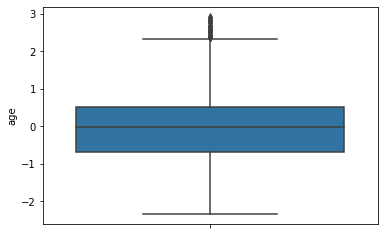

In [46]:
import seaborn as sns
sns.boxplot(y=data['age'])

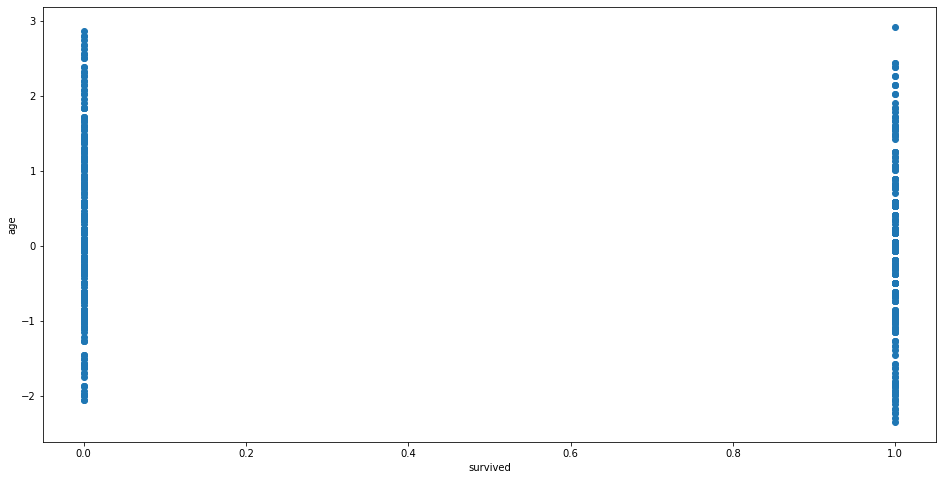

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['survived'], data['age'])
ax.set_xlabel('survived')
ax.set_ylabel('age')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

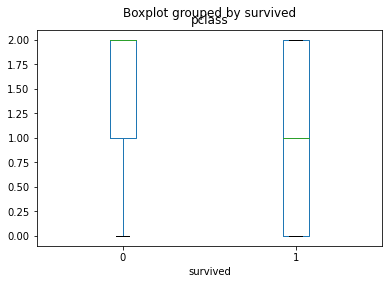

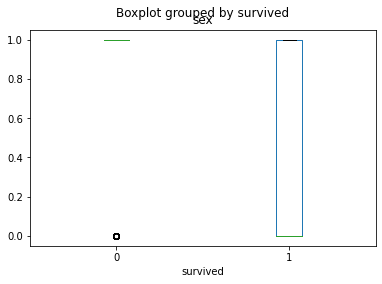

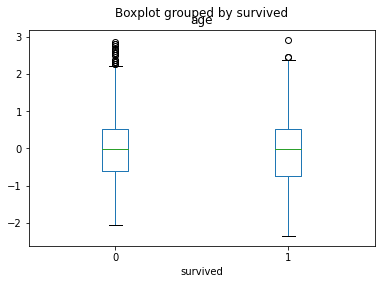

In [48]:
import matplotlib.pyplot as plt

x = data.drop("survived",1)
columns_name = list(x.columns)

for i in columns_name:
    data.boxplot(by ='survived', column =[i], grid = False)

In [49]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['age']))
print(z)

threshold = 3
print(np.where(z > threshold))
print(z)

[0.67338688 0.76370943 0.3141128  0.52419338 0.52419338 0.01471774
 1.84153166 1.99072516 0.25423379 1.27217701 1.87096713 2.14092672
 0.85302392 0.82358844 1.27217701 1.90141067 1.99072516 0.01471774
 0.1649193  0.01471774 0.52419338 0.40443535 1.15241898 0.19435478
 1.63145108 0.76370943 0.01471774 0.91290293 0.01471774 0.01471774
 0.88346745 0.01471774 0.01471774 2.61995883 0.19435478 1.06310449
 0.01471774 0.73326589 0.97278194 1.27217701 0.88346745 0.25423379
 0.01471774 1.93084615 0.91290293 0.01471774 0.01471774 0.01471774
 0.01471774 0.97278194 1.6913301  0.73326589 1.5421366  0.07459675
 2.56007981 0.01471774 0.73326589 0.13447576 1.81108812 1.45181404
 0.67338688 0.76370943 1.24274153 1.87096713 0.01471774 0.01471774
 0.07459675 0.91290293 1.03266095 0.3141128  0.22479831 1.09253997
 0.73326589 0.3141128  0.22479831 0.37399181 0.01471774 0.01471774
 2.1703622  0.04516128 0.67338688 0.07459675 0.01471774 0.19435478
 1.03266095 0.34455634 1.09253997 0.01471774 0.61350787 0.4937

In [50]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pclass      1.00000
sex         1.00000
age         1.19758
survived    1.00000
dtype: float64


In [51]:
print(data.shape)

(891, 4)


In [52]:
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(872, 4)


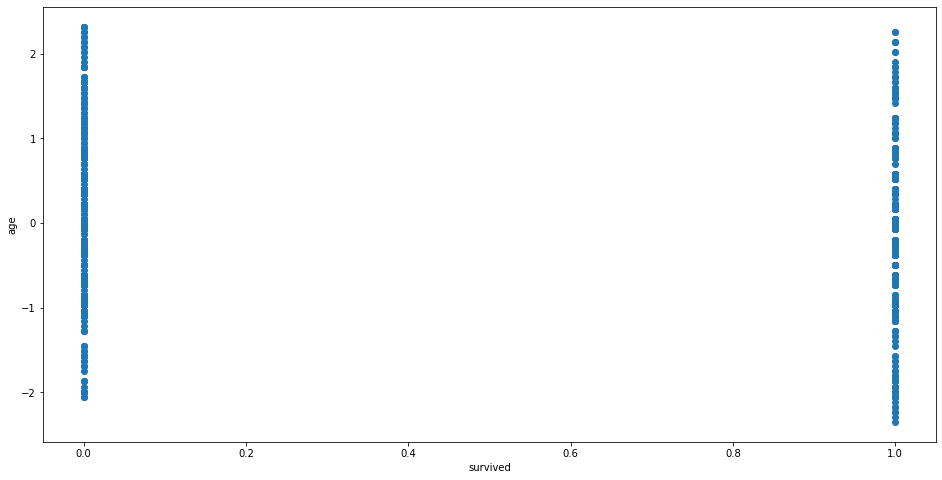

In [53]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['survived'], df_out['age'])
ax.set_xlabel('survived')
ax.set_ylabel('age')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadc4ca4250>],
      dtype=object)

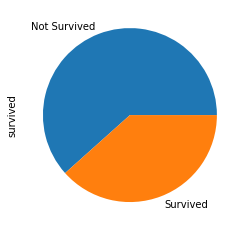

In [54]:
# Plot data untuk melihat perbandingan class bernilai survived atau tidak
survived_map= {0:'Not Survived', 1:'Survived'}

data['survived'].map(survived_map).value_counts().plot(kind='pie', subplots=True)

## Resampling

In [55]:
X= data.drop('survived', axis='columns')
y= data['survived']

print(Counter(y))

Counter({0: 549, 1: 342})


#### A. Oversampling

In [56]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({0: 549, 1: 549})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
over_sampled_data= pd.concat([pd.DataFrame(X_ros), pd.Series(y_ros)], axis='columns')
over_sampled_data.columns= data.columns
over_sampled_data

,pclass,sex,age,survived
0,2.0,1.0,-0.673387,0
1,0.0,0.0,0.763709,1
2,2.0,0.0,-0.314113,1
3,0.0,0.0,0.524193,1
4,2.0,1.0,0.524193,0
...,...,...,...,...
1093,1.0,0.0,0.404435,1
1094,2.0,0.0,-0.912903,1
1095,0.0,0.0,-1.032661,1
1096,0.0,0.0,0.344556,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadc4d38110>],
      dtype=object)

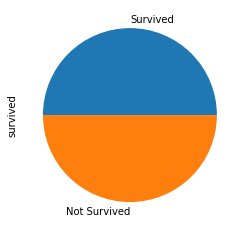

In [58]:
survived_map= {0:'Not Survived', 1:'Survived'}

over_sampled_data.survived.map(survived_map).value_counts().plot(kind='pie', subplots=True)

Bisa kita lihat sekarang datanya seimbang

1. SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smz, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({0: 549, 1: 549})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2. SMOTE Tomek

In [60]:
from imblearn.combine import SMOTETomek

smote= SMOTETomek(sampling_strategy='minority')
X_smz, y_sm= smote.fit_resample(X, y)

print(Counter(y_sm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 540, 1: 540})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### B. Undersampling

In [61]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({0: 342, 1: 342})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.  TOMEK Links

In [62]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl= tl.fit_resample(X, y)

print(Counter(y_tl))

Counter({0: 546, 1: 342})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

Counter({0: 342, 1: 342})


/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (179) found smaller than n_clusters (342). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Klasifikasi

In [64]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

len(x_test), len(x_train)

(179, 712)

[Text(111.19220342582108, 210.645, 'X[1] <= 0.5\ngini = 0.474\nsamples = 100.0%\nvalue = [0.614, 0.386]'),
 Text(47.01608154020386, 197.055, 'X[0] <= 1.5\n0.384\n34.7%\n[0.259, 0.741]'),
 Text(15.166477916194792, 183.465, 'X[2] <= -1.961\n0.112\n18.8%\n[0.06, 0.94]'),
 Text(9.099886749716875, 169.875, 'X[0] <= 0.5\n0.5\n0.3%\n[0.5, 0.5]'),
 Text(6.066591166477917, 156.285, '0.0\n0.1%\n[1.0, 0.0]'),
 Text(12.133182332955833, 156.285, '0.0\n0.1%\n[0.0, 1.0]'),
 Text(21.233069082672706, 169.875, 'X[2] <= -0.554\n0.1\n18.5%\n[0.053, 0.947]'),
 Text(18.19977349943375, 156.285, '0.0\n4.5%\n[0.0, 1.0]'),
 Text(24.266364665911667, 156.285, 'X[2] <= -0.284\n0.13\n14.0%\n[0.07, 0.93]'),
 Text(15.166477916194792, 142.695, 'X[2] <= -0.344\n0.337\n2.0%\n[0.214, 0.786]'),
 Text(12.133182332955833, 129.10500000000002, 'X[2] <= -0.434\n0.26\n1.8%\n[0.154, 0.846]'),
 Text(6.066591166477917, 115.515, 'X[0] <= 0.5\n0.18\n1.4%\n[0.1, 0.9]'),
 Text(3.0332955832389583, 101.925, '0.0\n0.7%\n[0.0, 1.0]'),
 Te

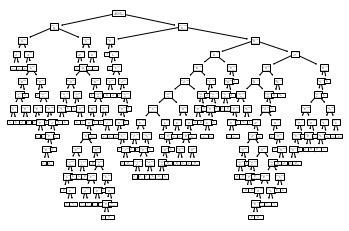

In [65]:
dct_model= tree.DecisionTreeClassifier()
dct_model.fit(x_train, y_train)

tree.plot_tree(dct_model, label='root', proportion=True)

In [66]:
pred_x= dct_model.predict(x_test)

accuraccy= (pred_x==y_test).sum()/len(y_test)
accuraccy

0.8324022346368715

Confusion matrix:
 [[103   9]
 [ 21  46]]


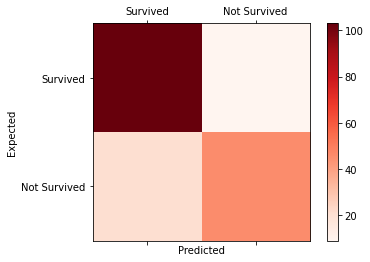

In [67]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_x)
print('Confusion matrix:\n', conf_mat)


labels = ['Survived', 'Not Survived']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()